In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [31]:
trip = pd.read_csv('~/aiffel/data_preprocess/data/trip.csv')

In [32]:
trip.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [33]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [34]:
trip.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


In [35]:
trip.describe(include='object')

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method
count,22701,22701,22701,22701
unique,20030,22687,22688,3
top,Michael Smith,07/03/2017 3:45:19 PM,10/18/2017 8:07:45 PM,Cash
freq,16,2,2,11196


# 첫 감상
- 목적은 택시 요금 예측. 그런데 amount 가 3개여서 일단은 fare 에만 초점을 두기로 하자
    - tip 많이 주는 구역? 예측도 재밌을듯. 혹은 인원 수나 거리
[v] 이름은 drop column
[v] ...그러기 전에 duplicate 제거
[v] 결측치 확인
    - 유무와 비율
- Outlier
    - int 컬럼은 전부 scatter plot 그려보세요
[v] pickup/dropoff 
    - datetime 변환
- payment method 
    - value_count 해서 이상한 애 날리기
    - 히스토그램? 도 그려볼까
    [v] card 로 통합
- passenger cnt 
    - MAX 36. boxplot 해서 확인 필요 (4인 이상 다 날리기?)
- trip_d 
    - 일단 음수값 나온 행 전부 제거. scatterplot 확인
- amount 
    [v] 값들은 결측치 있을 경우 행을 날려야 함

In [36]:
# find duplicates

trip[trip.duplicated()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.00,0.0


In [37]:
trip[trip['passenger_name'] == 'Lisa Bullock']

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
203,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.0,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.0,0.0


In [38]:
trip = trip.drop_duplicates()

In [39]:
trip[trip['passenger_name'] == 'Sarah Gross']

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
16,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0


In [40]:
trip[trip.duplicated()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount


In [41]:
# name 제거

trip = trip.drop('passenger_name', axis = 1)

In [42]:
#missing values

trip.isna().mean() #0.01% 이고, fare 데이터가 없으면 소용이 없기때문에 제거하기로 함

tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
payment_method           0.000000
passenger_count          0.000000
trip_distance            0.000000
fare_amount              0.000132
tip_amount               0.000000
tolls_amount             0.000000
dtype: float64

In [43]:
##0.01% 이고, fare 데이터가 없으면 소용이 없기때문에 제거하기로 함

trip = trip.dropna(subset = ['fare_amount'])

In [44]:
trip.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [47]:
# 컬럼 이름이 너무 길다

trip.rename({'tpep_pickup_datetime' : 'pickup' , 'tpep_dropoff_datetime' : 'dropoff'}, axis = 1, inplace = True)

In [48]:
trip.head()

,pickup,dropoff,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [53]:
# datetime 변환
trip['pickup'] = pd.to_datetime(trip['pickup'])
trip['dropoff'] = pd.to_datetime(trip['dropoff'])

In [54]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22696 entries, 0 to 22700
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           22696 non-null  datetime64[ns]
 1   dropoff          22696 non-null  datetime64[ns]
 2   payment_method   22696 non-null  object        
 3   passenger_count  22696 non-null  int64         
 4   trip_distance    22696 non-null  float64       
 5   fare_amount      22696 non-null  float64       
 6   tip_amount       22696 non-null  float64       
 7   tolls_amount     22696 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int64(1), object(1)
memory usage: 2.1+ MB


In [55]:
trip.head()

,pickup,dropoff,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,2017-03-25 08:55:43,2017-03-25 09:09:47,Debit Card,6,3.34,13.0,2.76,0.0
1,2017-04-11 14:53:28,2017-04-11 15:19:58,Debit Card,1,1.80,16.0,4.00,0.0
2,2017-12-15 07:26:56,2017-12-15 07:34:08,Debit Card,1,1.00,6.5,1.45,0.0
3,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.0
4,2017-04-15 23:32:20,2017-04-15 23:49:03,Debit Card,1,4.37,16.5,0.00,0.0


In [57]:
# payment 컬럼 정리

trip['payment_method'].value_counts()

Cash           11192
Debit Card      5782
Credit Card     5722
Name: payment_method, dtype: int64

In [61]:
trip['payment_method'] =  trip['payment_method'].apply(lambda x: 'Card' if 'card' in x.lower() else x)

In [62]:
trip['payment_method']

0        Card
1        Card
2        Card
3        Cash
4        Card
         ... 
22696    Cash
22697    Cash
22698    Card
22699    Card
22700    Cash
Name: payment_method, Length: 22696, dtype: object

# 중간 점검
- 목적은 택시 요금 예측. 그런데 amount 가 3개여서 일단은 fare 에만 초점을 두기로 하자
    - tip 많이 주는 구역? 예측도 재밌을듯. 혹은 인원 수나 거리
[v] 이름은 drop column
[v] ...그러기 전에 duplicate 제거
[v] 결측치 확인
    - 유무와 비율
- Outlier
    - int 컬럼은 전부 scatter plot 그려보세요
[v] pickup/dropoff 
    - datetime 변환
[v] payment method 
    - value_count 해서 이상한 애 날리기
    - 히스토그램? 도 그려볼까
    [v] card 로 통합
- passenger cnt 
    - MAX 36. boxplot 해서 확인 필요 (4인 이상 다 날리기?)
- trip_d 
    - 일단 음수값 나온 행 전부 제거. scatterplot 확인
- amount 
    [v] 값들은 결측치 있을 경우 행을 날려야 함

In [63]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22696 entries, 0 to 22700
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           22696 non-null  datetime64[ns]
 1   dropoff          22696 non-null  datetime64[ns]
 2   payment_method   22696 non-null  object        
 3   passenger_count  22696 non-null  int64         
 4   trip_distance    22696 non-null  float64       
 5   fare_amount      22696 non-null  float64       
 6   tip_amount       22696 non-null  float64       
 7   tolls_amount     22696 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int64(1), object(1)
memory usage: 2.1+ MB


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: could not convert string to float: 'Card'

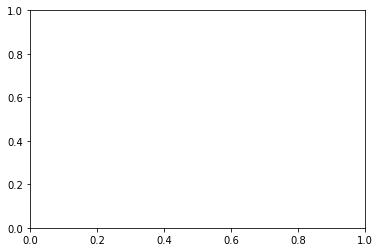

In [145]:
# 각 지불방법의 비중? 을 보고 싶음
## object 에서는 어떤 플롯을 써야 하나?

sns.distplot(trip['payment_method'])

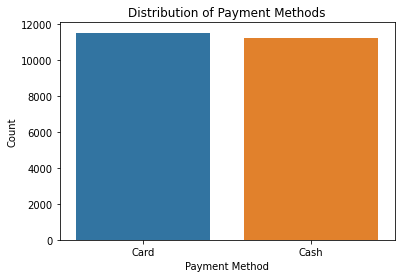

In [67]:
# Count plot for payment methods
sns.countplot(x='payment_method', data=trip)

# Adding titles and labels for clarity
plt.title('Distribution of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')

# Show the plot
plt.show()


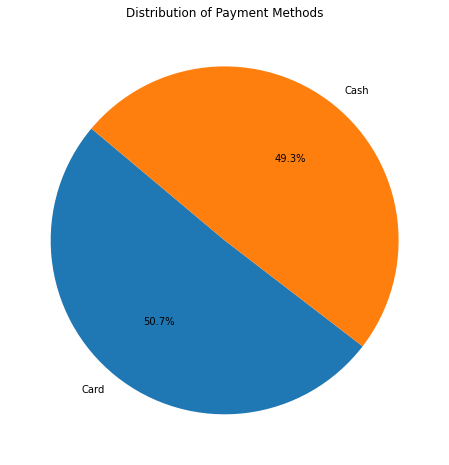

In [68]:
import matplotlib.pyplot as plt

# Count the occurrences of each payment method
payment_method_counts = trip['payment_method'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))  # Optional: Specifies the figure size
plt.pie(payment_method_counts, labels=payment_method_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Payment Methods')

# Show the plot
plt.show()


In [70]:
# 칼럼별로 plot 한번씩 찍어보기
## numeric 은 scatterplot
## categorical 은 piechart / countplot
## datetime 은 

trip.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22696.000000,22696.000000,22696.000000,22696.000000,22696.000000
mean,1.643638,2.912231,13.023681,1.835363,0.312329
std,1.305027,3.651483,13.240551,2.800182,1.398834
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


### passenger_count

x < 1 | x > 6 인 데이터를 어떻게 하지?
x = 0 인 데이터를 신뢰할 수 있는가?
passenger count 는 팁 계산할 때 정도만 중요한 정보 아닐까? 얘는 그냥 두자

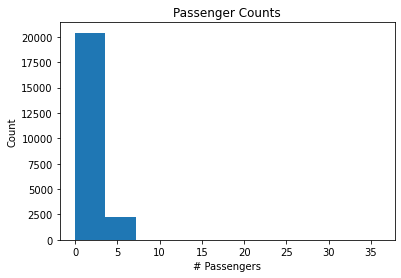

In [72]:
# histogram - continuous or has a large range of values

# Count plot for payment methods
plt.hist(trip['passenger_count'])

# Adding titles and labels for clarity
plt.title('Passenger Counts')
plt.xlabel('# Passengers')
plt.ylabel('Count')

# Show the plot
plt.show()

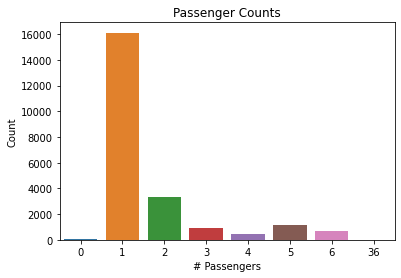

In [73]:
# countplot - categorical

sns.countplot(x='passenger_count', data=trip)

# Adding titles and labels for clarity
plt.title('Passenger Counts')
plt.xlabel('# Passengers')
plt.ylabel('Count')

# Show the plot
plt.show()

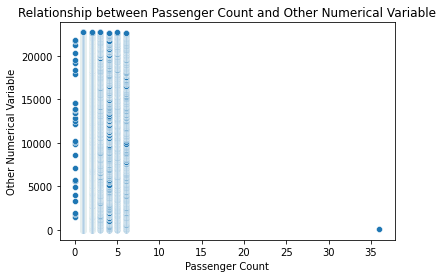

In [75]:
# scatterplot - ???
## row index 넘버에 점이 찍힘

import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'other_numerical_column' with the actual name of the other column you want to compare
sns.scatterplot(x='passenger_count', y=trip.index, data=trip)

# Adding titles and labels for clarity
plt.title('Relationship between Passenger Count and Other Numerical Variable')
plt.xlabel('Passenger Count')
plt.ylabel('Other Numerical Variable')

# Show the plot
plt.show()


In [81]:
# x < 1 | x > 6 인 데이터를 어떻게 하지?
## x = 0 인 데이터를 신뢰할 수 있는가?
## passenger count 는 팁 계산할 때 정도만 중요한 정보 아닐까? 얘는 그냥 두자 or 통째로 날리자
### 그냥 두면 다른 이상치 지울 때 지워질듯

trip[trip['passenger_count'] == 0].count() / len(trip['passenger_count']) 
# 0.14%

trip[trip['passenger_count'] == 0]

,pickup,dropoff,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
1518,2017-11-14 15:45:23,2017-11-14 16:26:38,Card,0,8.8,33.0,5.55,5.76
1876,2017-12-03 12:05:52,2017-12-03 12:13:51,Cash,0,1.1,7.0,0.00,0.00
1927,2017-09-09 03:44:45,2017-09-09 03:49:19,Cash,0,0.8,5.0,0.00,0.00
3354,2017-12-18 22:44:57,2017-12-18 23:00:24,Cash,0,2.7,12.5,2.75,0.00
4062,2017-11-27 13:08:01,2017-11-27 13:17:55,Card,0,1.7,9.0,1.95,0.00
4921,2017-12-16 14:59:17,2017-12-16 15:21:59,Card,0,3.1,15.5,4.05,0.00
5565,2017-09-04 17:40:00,2017-09-04 17:51:52,Cash,0,1.3,9.0,1.95,0.00
5605,2017-12-17 12:18:49,2017-12-17 12:40:45,Cash,0,4.2,18.0,3.75,0.00
5670,2017-12-16 19:50:12,2017-12-16 20:00:30,Cash,0,1.0,8.0,1.50,0.00
5769,2017-10-04 15:17:52,2017-10-04 15:56:26,Cash,0,10.4,34.0,8.10,5.76


### Trip Distance

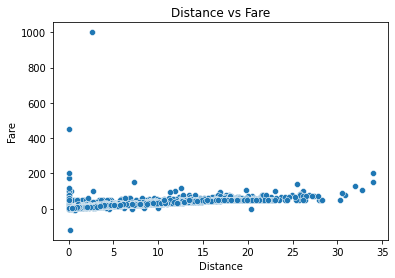

In [86]:
# 요금과 같이 봐야 아웃라이어가 보일 것
## Distane 가 짧은데 요금이 비싼 애들 빼자

import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'other_numerical_column' with the actual name of the other column you want to compare
sns.scatterplot(x='trip_distance', y='fare_amount', data=trip)

# Adding titles and labels for clarity
plt.title('Distance vs Fare')
plt.xlabel('Distance')
plt.ylabel('Fare')

# Show the plot
plt.show()

In [96]:
trip[trip['trip_distance'] < 1].sort_values(by = 'trip_distance', ascending = False)

,pickup,dropoff,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,timestamp
5653,2017-09-13 22:19:10,2017-09-13 22:26:55,Cash,1,0.99,6.5,0.78,0.00,1.505342e+09
7015,2017-07-02 14:57:48,2017-07-02 15:02:55,Cash,1,0.99,5.5,1.26,0.00,1.499008e+09
2983,2017-02-07 20:05:05,2017-02-07 20:11:14,Card,1,0.99,6.0,1.46,0.00,1.486498e+09
11034,2017-02-28 19:41:17,2017-02-28 19:47:06,Cash,1,0.99,6.0,1.56,0.00,1.488311e+09
21647,2017-07-23 00:56:53,2017-07-23 01:03:48,Cash,5,0.99,6.5,1.95,0.00,1.500772e+09
...,...,...,...,...,...,...,...,...,...
9620,2017-11-17 00:10:41,2017-11-17 00:10:43,Cash,1,0.00,46.0,5.00,0.00,1.510877e+09
9665,2017-12-25 22:01:06,2017-12-25 22:01:32,Card,2,0.00,52.0,16.56,13.45,1.514239e+09
22045,2017-07-06 10:27:11,2017-07-06 10:40:07,Cash,1,0.00,52.0,0.00,0.00,1.499338e+09
15086,2017-08-11 18:16:12,2017-08-11 18:17:43,Cash,1,0.00,3.0,0.00,0.00,1.502475e+09


In [95]:
# distance 가 0 인 아이들 어떻게 할 것인가?

trip[trip['trip_distance'] == 0]['fare_amount'].median()

3.0

### fare_amount 

In [104]:
# - 값 제거

trip = trip[~(trip['fare_amount'] <0)]

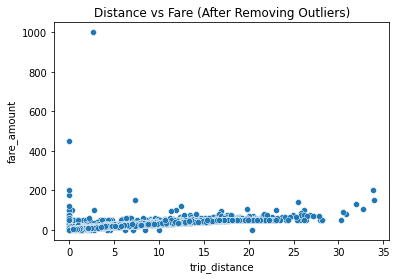

In [106]:
sns.scatterplot(x='trip_distance', y='fare_amount', data=trip)
plt.title('Distance vs Fare (After Removing Outliers)')
plt.show()

In [107]:
## Distane 가 짧은데 요금이 비싼 애들 빼자


# Define your distance threshold
distance_threshold = 3

# Calculatefare_amount IQR for fares
Q1 = trip['fare_amount'].quantile(0.25)
Q3 = trip['fare_amount'].quantile(0.75)
IQR = Q3 - Q1

# Define a high fare threshold (e.g., fares above Q3 + 1.5 * IQR)
high_fare_threshold = Q3 + 1.5 * IQR

# Filter out outliers: short distances but fares much higher than typical
trip = trip[~((trip['trip_distance'] < distance_threshold) & (trip['fare_amount'] > high_fare_threshold))]


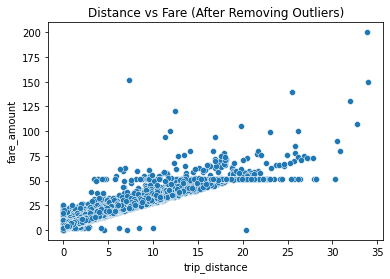

In [108]:
sns.scatterplot(x='trip_distance', y='fare_amount', data=trip)
plt.title('Distance vs Fare (After Removing Outliers)')
plt.show()


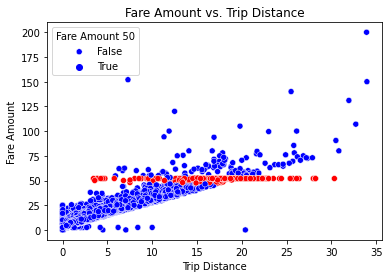

In [116]:
# 50 주변에 뭉쳐있는 애들 뭐지

import seaborn as sns
import matplotlib.pyplot as plt

# Create a new column for coloring the points
trip['fare_50'] = (trip['fare_amount'] > 47) & (trip['fare_amount'] < 53)

# Use seaborn scatterplot with hue
sns.scatterplot(x='trip_distance', y='fare_amount', hue='fare_50', palette=['blue', 'red'], data=trip)

# Customize the plot
plt.title('Fare Amount vs. Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.legend(title='Fare Amount 50', labels=['False', 'True'])

# Show the plot
plt.show()


In [117]:
# distance 5 이상인데 fare 10 미만인 애들 지울것인가?
## over-fitting?

In [129]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22610 entries, 0 to 22700
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           22610 non-null  datetime64[ns]
 1   dropoff          22610 non-null  datetime64[ns]
 2   payment_method   22610 non-null  object        
 3   passenger_count  22610 non-null  int64         
 4   trip_distance    22610 non-null  float64       
 5   fare_amount      22610 non-null  float64       
 6   tip_amount       22610 non-null  float64       
 7   tolls_amount     22610 non-null  float64       
 8   timestamp        22610 non-null  float64       
 9   fare_50          22610 non-null  bool          
 10  time_diff        22610 non-null  int64         
dtypes: bool(1), datetime64[ns](2), float64(5), int64(2), object(1)
memory usage: 1.9+ MB


### pickup & dropoff

In [127]:
# 시간차이 구하고 분 단위 int 로 변환

trip['time_diff'] = trip['dropoff'] - trip['pickup']
trip['time_diff']

import pandas as pd

# Example: Convert 'time_delta' column from timedelta to integer minutes
trip['time_diff'] = trip['time_diff'].dt.total_seconds() / 60

# Convert to integer
trip['time_diff'] = trip['time_diff'].astype(int)
trip['time_diff']

0        14
1        26
2         7
3        30
4        16
         ..
22696     3
22697    40
22698     4
22699    11
22700    13
Name: time_diff, Length: 22610, dtype: int64

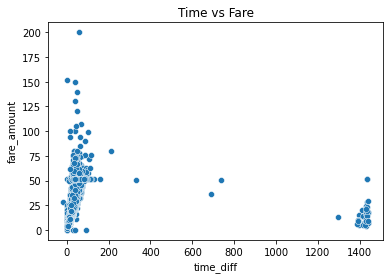

In [142]:
sns.scatterplot(x='time_diff', y='fare_amount', data=trip)
plt.title('Time vs Fare')
plt.show()

In [139]:
trip[trip['time_diff'] > 600].count() / len(trip) # 0.19%

pickup             0.001902
dropoff            0.001902
payment_method     0.001902
passenger_count    0.001902
trip_distance      0.001902
fare_amount        0.001902
tip_amount         0.001902
tolls_amount       0.001902
timestamp          0.001902
fare_50            0.001902
time_diff          0.001902
dtype: float64

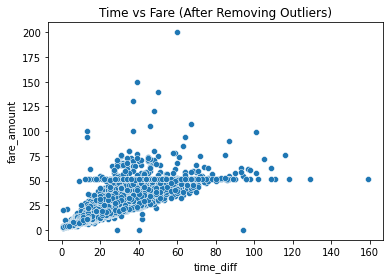

In [144]:
# 그럼 이상치라고 하고 다 지울까?
## 러시아워에 엄청나게 막히는 곳이었으면 어떻게 하지
## 일단 걔네 빼고 다시 플롯 그려보자

trip_time_filtered = trip[(trip['time_diff'] <= 200) & (trip['time_diff'] > 0)]

sns.scatterplot(x='time_diff', y='fare_amount', data=trip_time_filtered)
plt.title('Time vs Fare (After Removing Outliers)')
plt.show()

### Pickup & Dropoff

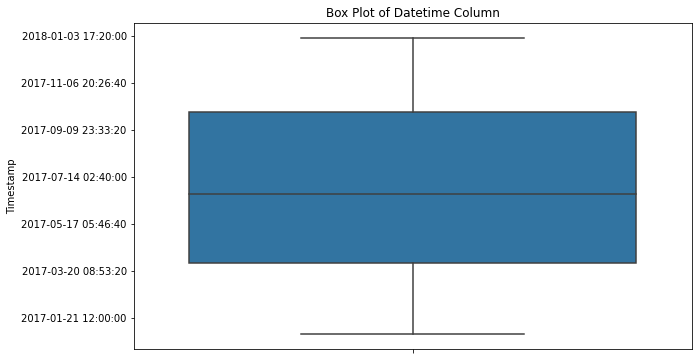

In [84]:
# Assuming 'datetime_column' is your datetime column in the 'trip' DataFrame
trip['timestamp'] = trip['pickup'].apply(lambda x: x.timestamp())

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(y=trip['timestamp'])

plt.title('Box Plot of Datetime Column')
plt.ylabel('Timestamp')

# Optionally, format the y-axis to show datetime
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: pd.to_datetime(x, unit='s')))

plt.show()


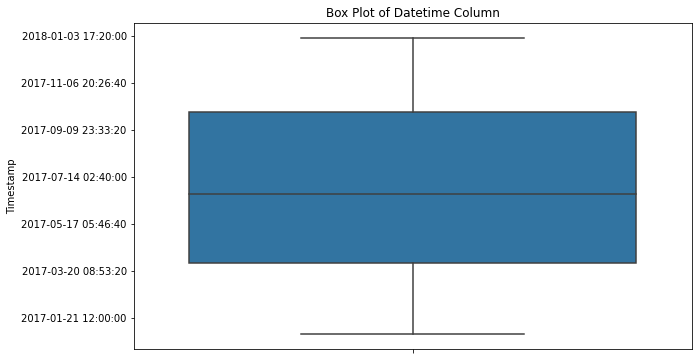

In [85]:
# Assuming 'datetime_column' is your datetime column in the 'trip' DataFrame
trip['timestamp'] = trip['dropoff'].apply(lambda x: x.timestamp())

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(y=trip['timestamp'])

plt.title('Box Plot of Datetime Column')
plt.ylabel('Timestamp')

# Optionally, format the y-axis to show datetime
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: pd.to_datetime(x, unit='s')))

plt.show()


# 하려던 거 잘 했나?
- 목적은 택시 요금 예측. 그런데 amount 가 3개여서 일단은 fare 에만 초점을 두기로 하자
    - tip 많이 주는 구역? 예측도 재밌을듯. 혹은 인원 수나 거리
[v] 이름은 drop column
[v] ...그러기 전에 duplicate 제거
[v] 결측치 확인
    - 유무와 비율
- Outlier
    [v] int 컬럼은 전부 scatter plot 그려보세요
[v] pickup/dropoff 
    - datetime 변환
[v] payment method 
    - value_count 해서 이상한 애 날리기
    - 히스토그램? 도 그려볼까
    [v] card 로 통합
[v] passenger cnt 
    - MAX 36. boxplot 해서 확인 필요 (4인 이상 다 날리기?)
[v] trip_d 
    - 일단 음수값 나온 행 전부 제거. scatterplot 확인
- amount 
    [v] 값들은 결측치 있을 경우 행을 날려야 함
    
# Outlier 찾기의 남은 일
- tip 과 toll 아직 안해봄
- fare 를 예측하는 게 목표인데 fare 가 50 인 이상치들이 한 뭉텅이 있다

# 회고

### 잘한 점
- 처음에 할 일을 적고 시작했다
- 적고 해도 중간에 길을 잃는데 (내가 뭘 하려던거지..?) 안 적었으면 더 헤메였을 거다

### 잘할 수 있는 점
- 무슨 plot 이 무슨 데이터를 보여주는지는 좀 더 익숙해져야 한다
- planning 시간을 좀 더 잡아도 될 거 같다
- 분석 중간중간에도 planning 으로 돌아오자

### 그 외 했던 생각들
- 얼마나 민감하게? outlier 를 정의할 것인가
- 내 맘대로 무 자르듯 퉁퉁 잘라버려도 되나?
- 아웃라이어가 뭉텅이로 모여있을 때, 이들만 떼어서 따로 분석하기에는 시간이 너무 부족한데..
- 얼마나 깊게 들어갈 것인가?
- 충분히 고문한다면 데이터는 무슨 말이던 할 것이다..!
- 오히려 진짜 내 일이었으면 다 잘라내고 결론 도출(?) 부터 한 다음에 아웃라이어들을 더해가며 분석해봤을지도
- 장님 코끼리 더듬기는 참 어렵다